# Credit Card Default Prediction

# We are implementing the **PACE** methodology which acts as a framework to simplify the process of building a machine learning model , 
# PACE classify the whole project to 4 stages :
  - ### Plan
  - ### Analyze
  - ### Construct
  - ### Execute

## **Pace: Plan**

###  The business scenario and problem

In today’s competitive financial environment, lending institutions face a growing challenge in managing credit risk. With the increasing use of credit cards and installment-based credit, ensuring timely repayment is critical to maintaining financial health and minimizing losses from customer defaults.

For this project, we are partnering with Guardian Banking Systems, a leading financial institution committed to responsible lending and risk management. The primary goal is to leverage machine learning techniques to develop a predictive system that can identify customers at risk of defaulting on their credit card payments before it happens.

The objective of this project is to build a robust machine learning model capable of predicting whether a customer will default on their credit card payment in the next month. The model will analyze customer demographics, historical billing information, payment behaviors, and credit utilization patterns. Key challenges and business objectives include:

- Early Risk Identification: Detect high-risk customers before default occurs, allowing the institution to take preventive actions such as credit limit adjustments or proactive outreach.

- Data Complexity: The dataset contains various time-dependent variables, including monthly bill amounts and payments, requiring careful feature engineering to extract meaningful signals.

- Cost of Misclassification: Incorrect predictions have consequences. Flagging a reliable customer as a defaulter may damage customer relationships, while missing a true defaulter could result in financial losses.

- Actionable Insights: Beyond prediction, the model should provide explainable insights to help the credit risk team understand the drivers behind customer default risk and shape lending policy accordingly.

###  Evaluation Metric

Choosing the right evaluation metric is essential and depends on the business impact of prediction errors.

**Accuracy**: While straightforward, accuracy can be misleading in imbalanced datasets — like ours, where most customers pay on time and a smaller portion default.

**Precision**: Important when false positives (predicting default when the customer won’t default) are costly — e.g., wrongly restricting a reliable customer’s credit access.

**Recall**: Useful when false negatives (failing to identify a true defaulter) are more harmful — e.g., allowing high-risk customers to accumulate unpaid debt.

**F1-score**: Best when both types of errors are costly, and a balanced trade-off is required.

In this project:
**False positives** may lead to unnecessary restrictions on good customers, causing frustration and potential loss of loyalty.

**False negatives**, however, could result in real financial losses, missed payments, and reduced recovery likelihood.

Since both misclassification types carry substantial risk, we will optimize and evaluate the model using the F1-score, which balances precision and recall.

## Step 1. Imports

### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC
from xgboost import plot_importance
from sklearn.metrics  import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import precision_score  , recall_score , accuracy_score, f1_score
from sklearn.model_selection import train_test_split , GridSearchCV ,  PredefinedSplit
from sklearn.preprocessing import StandardScaler

### Load dataset


In [2]:
# Load the main dataset
df = pd.read_csv("default of credit card clients.csv" , header=1)

In [4]:
# Display first few rows of the main dataset
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


## Step 2. Data Exploration (Initial EDA and data cleaning)

### Identifying number of rows and columns in the dataset

In [5]:
df.shape

(30000, 25)

### basic information about the data

In [6]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

great ! no missing values

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df.duplicated().sum()

0

### Check outliers

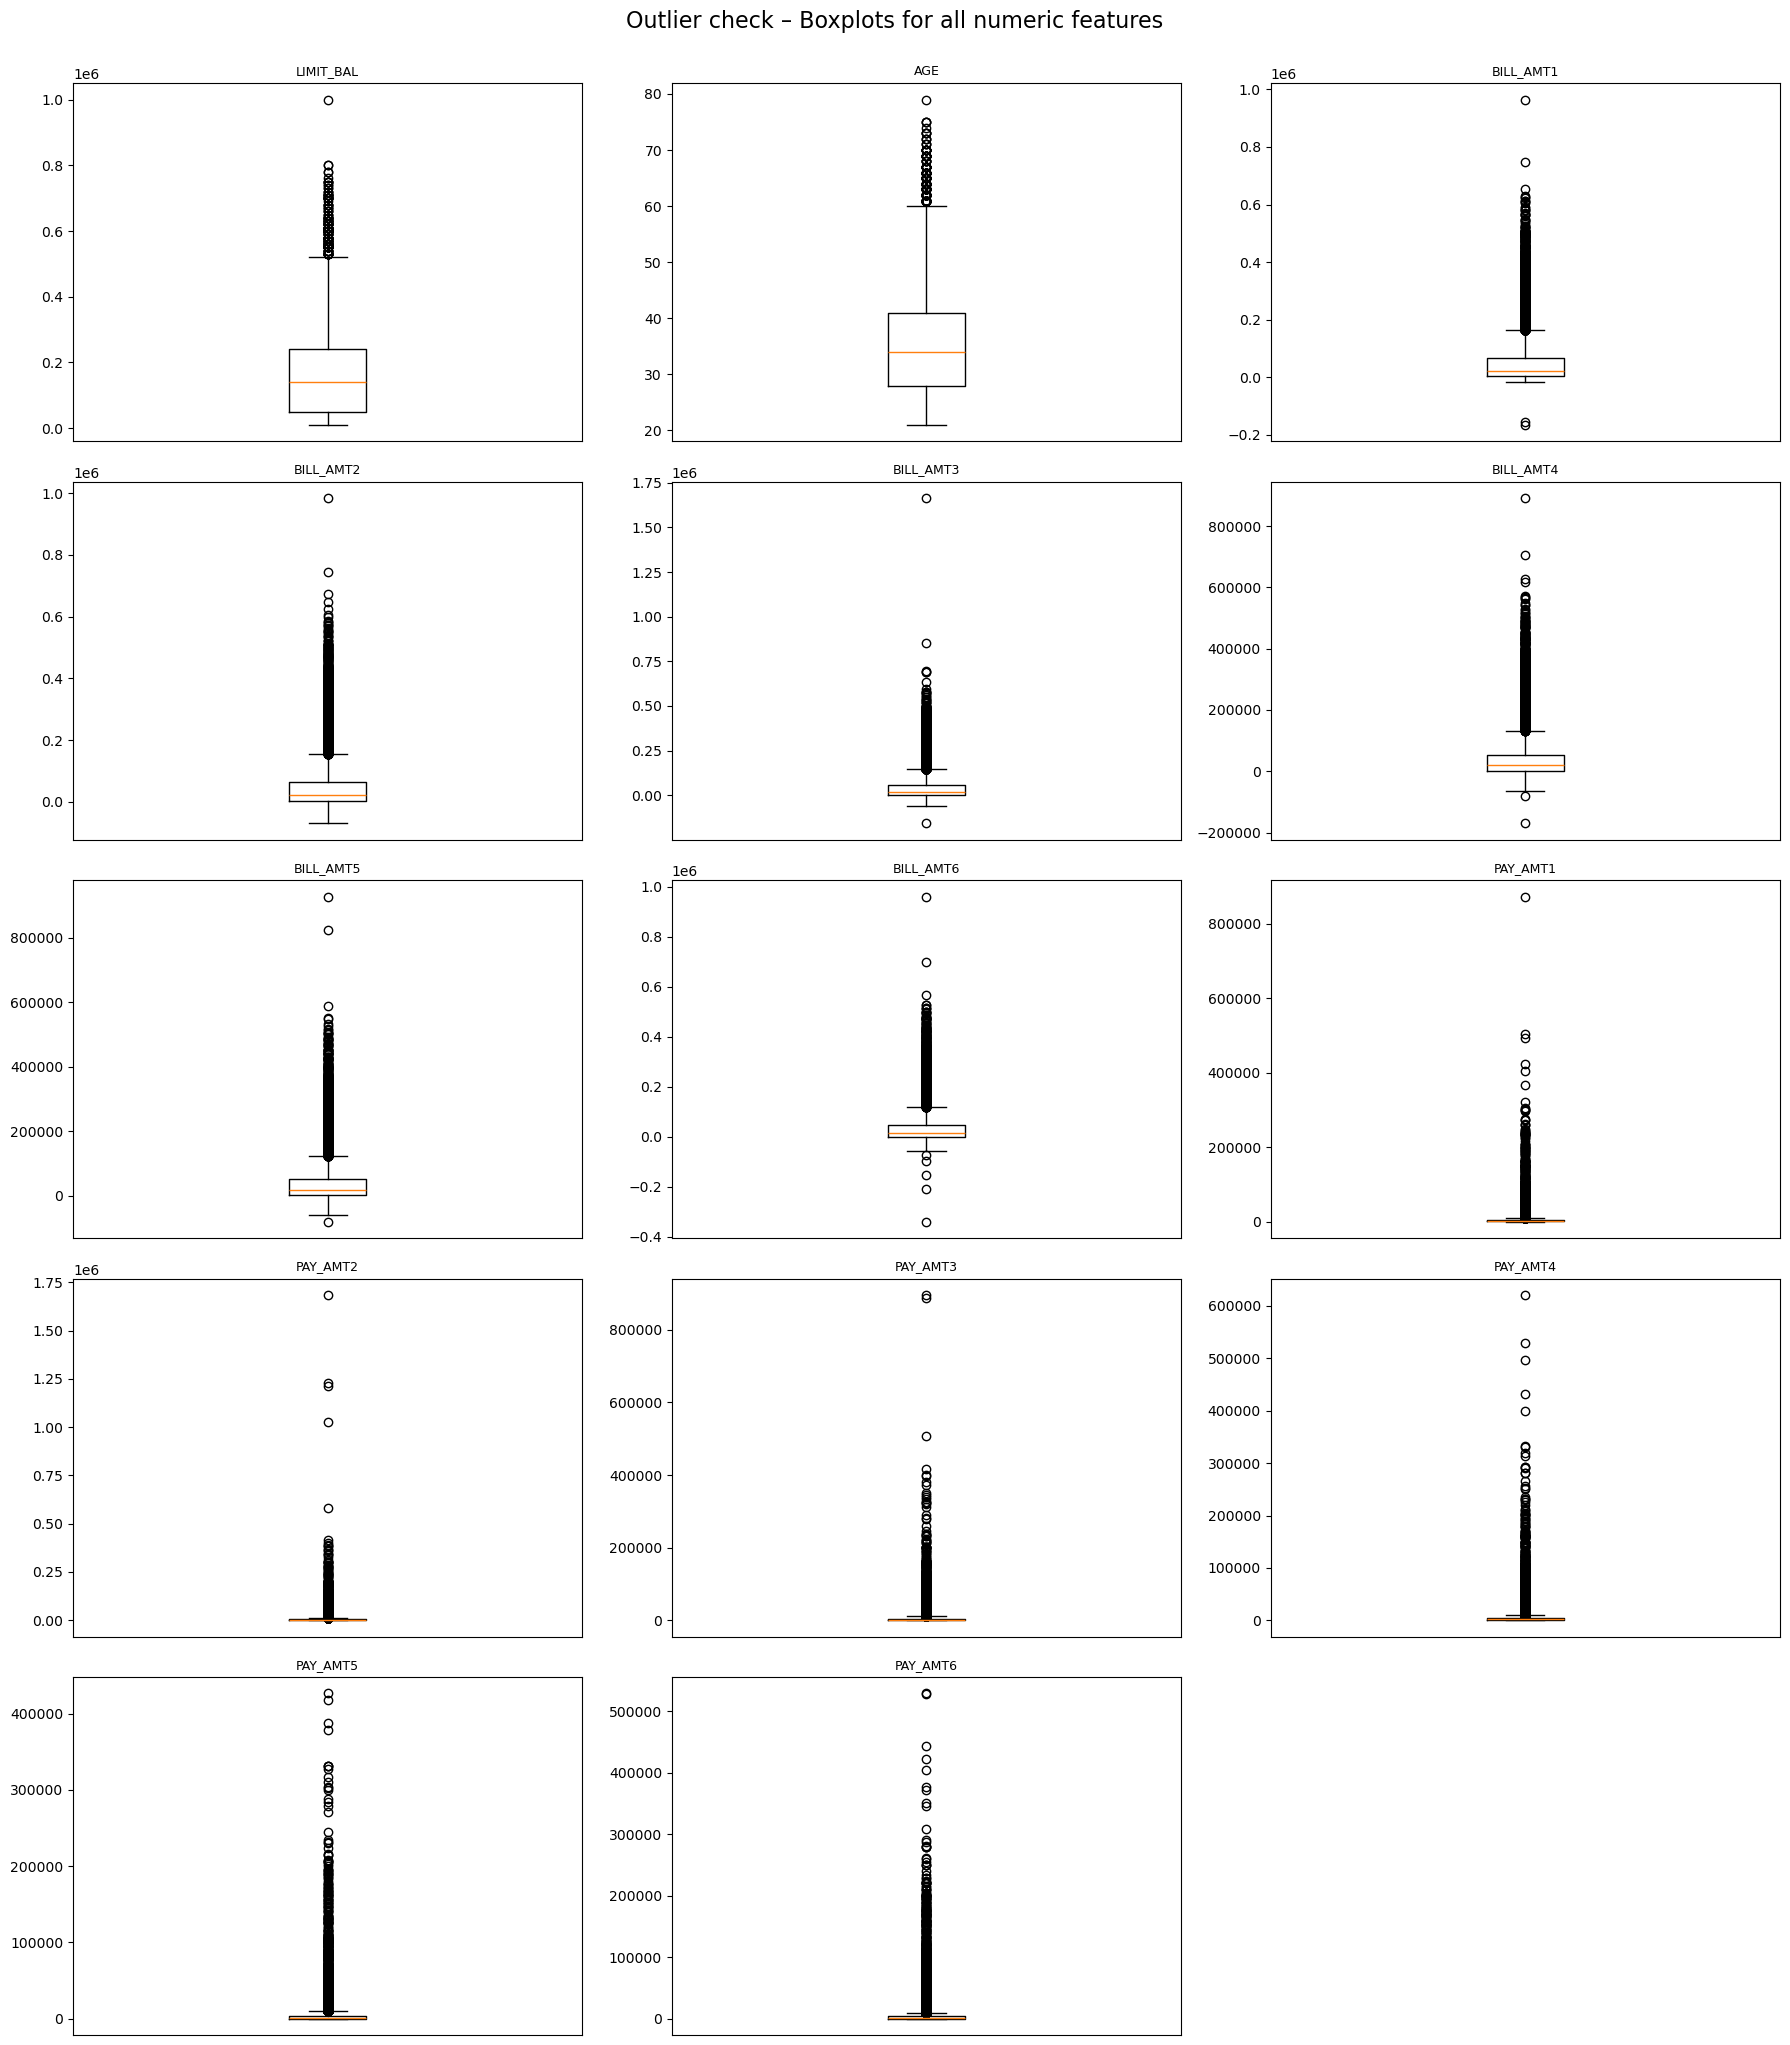

In [10]:
features_df = df.drop(['ID', 'default payment next month' , 'SEX' , 'MARRIAGE' , 'EDUCATION' , 'PAY_0' , 'PAY_2' , 'PAY_3' , 'PAY_4' , 'PAY_5' , 'PAY_6'] , axis = 1)

n_features = features_df.shape[1]
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))

# ── 4. Draw a box-plot for each feature ───────────────────────
for idx, col in enumerate(features_df.columns, start=1):
    plt.subplot(n_rows, n_cols, idx)
    plt.boxplot(features_df[col].dropna(), vert=True)
    plt.title(col, fontsize=9)
    plt.xticks([])           # hide x-axis ticks (optional)
    plt.tight_layout()

plt.suptitle("Outlier check – Boxplots for all numeric features",
             y=1.02, fontsize=16)
plt.show()

We are going to use ensemble methods , which are robust to outliers , so no need to drop them

In [15]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
print(df['EDUCATION'].unique())
print(df['MARRIAGE'].unique())
print(df['PAY_4'].unique())

[2 1 3 5 4 6 0]
[1 2 3 0]
[-1  0 -2  2  3  4  5  7  6  1  8]


# pAce: Analyze Stage

### Feature Engineering

let's first drop unnecessary columns we won't work with

In [18]:
df = df.drop('ID', axis = 1)

In [19]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


EDUCATION , MARRIAGE , and SEX columns , are categorical columns , we need to convert the to their correct type 'category'

In [20]:
#df['SEX'] = df['SEX'].astype('category')
#df['EDUCATION'] = df['EDUCATION'].astype('category')
#df['MARRIAGE'] = df['MARRIAGE'].astype('category')

let's check that the variables are successfully converted to category type

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

Now we want to engineer a new `Credit Utilization Features` for each month, These capture how much of the available credit was being used

In [22]:
# Utilization per month (bill / limit)
for i in range(1, 7):
    df[f'util_{i}'] = df[f'BILL_AMT{i}'] / (df['LIMIT_BAL'] + 1)

# Summary stats
df['util_mean'] = df[[f'util_{i}' for i in range(1, 7)]].mean(axis=1)
df['util_max']  = df[[f'util_{i}' for i in range(1, 7)]].max(axis=1)

let's have a look at the new featurs

In [23]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,default payment next month,util_1,util_2,util_3,util_4,util_5,util_6,util_mean,util_max
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,1,0.195640,0.155092,0.034448,0.000000,0.000000,0.000000,0.064197,0.195640
1,120000,2,2,2,26,-1,2,0,0,0,...,2000,1,0.022350,0.014375,0.022350,0.027266,0.028791,0.027175,0.023718,0.028791
2,90000,2,2,2,34,0,0,0,0,0,...,5000,0,0.324874,0.155854,0.150654,0.159232,0.166087,0.172765,0.188244,0.324874
3,50000,2,2,1,37,0,0,0,0,0,...,1000,0,0.939781,0.964641,0.985800,0.566269,0.579168,0.590928,0.771098,0.985800
4,50000,1,2,1,57,-1,0,-1,0,0,...,679,0,0.172337,0.113398,0.716686,0.418792,0.382912,0.382612,0.364456,0.716686


another useful features to be engineered is `Repayment-to-Bill Ratios` which shows  whether the person paid off their bills fully, partially, or not at all.

In [24]:
# Ratio of payment to bill per month
for i in range(1, 7):
    df[f'pay_ratio_{i}'] = df[f'PAY_AMT{i}'] / (df[f'BILL_AMT{i}'] + 1)

# Summary
df['pay_ratio_mean'] = df[[f'pay_ratio_{i}' for i in range(1, 7)]].mean(axis=1)

In [25]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,util_6,util_mean,util_max,pay_ratio_1,pay_ratio_2,pay_ratio_3,pay_ratio_4,pay_ratio_5,pay_ratio_6,pay_ratio_mean
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.000000,0.064197,0.195640,0.000000,0.222043,0.000000,0.000000,0.000000,0.000000,0.037007
1,120000,2,2,2,26,-1,2,0,0,0,...,0.027175,0.023718,0.028791,0.000000,0.579374,0.372717,0.305530,0.000000,0.613121,0.311790
2,90000,2,2,2,34,0,0,0,0,0,...,0.172765,0.188244,0.324874,0.051915,0.106929,0.073746,0.069774,0.066894,0.321543,0.115134
3,50000,2,2,1,37,0,0,0,0,0,...,0.590928,0.771098,0.985800,0.042561,0.041858,0.024345,0.038849,0.036913,0.033843,0.036395
4,50000,1,2,1,57,-1,0,-1,0,0,...,0.382612,0.364456,0.716686,0.232072,6.468171,0.279049,0.429779,0.035985,0.035490,1.246758


another useful feature to enginerr is `num_delays` , which will count how many months the customer was late on their payment.

In [26]:
pay_cols = [f'PAY_{i}' for i in [0, 2, 3, 4, 5, 6]]
df['num_delays'] = (df[pay_cols] > 0).sum(axis=1)

In [27]:
pd.set_option('display.max_columns', None)
df.head(15)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,util_1,util_2,util_3,util_4,util_5,util_6,util_mean,util_max,pay_ratio_1,pay_ratio_2,pay_ratio_3,pay_ratio_4,pay_ratio_5,pay_ratio_6,pay_ratio_mean,num_delays
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.195640,0.155092,0.034448,0.000000,0.000000,0.000000,0.064197,0.195640,0.000000,0.222043,0.000000,0.000000,0.000000,0.000000,0.037007,2
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.022350,0.014375,0.022350,0.027266,0.028791,0.027175,0.023718,0.028791,0.000000,0.579374,0.372717,0.305530,0.000000,0.613121,0.311790,2
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.324874,0.155854,0.150654,0.159232,0.166087,0.172765,0.188244,0.324874,0.051915,0.106929,0.073746,0.069774,0.066894,0.321543,0.115134,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.939781,0.964641,0.985800,0.566269,0.579168,0.590928,0.771098,0.985800,0.042561,0.041858,0.024345,0.038849,0.036913,0.033843,0.036395,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.172337,0.113398,0.716686,0.418792,0.382912,0.382612,0.364456,0.716686,0.232072,6.468171,0.279049,0.429779,0.035985,0.035490,1.246758,0
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,1.287974,1.141357,1.152137,0.387872,0.392372,0.400472,0.793697,1.287974,0.038819,0.031803,0.011404,0.051560,0.050968,0.039950,0.037417,0
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,0.735929,0.824044,0.890012,1.085304,0.966004,0.947886,0.908197,1.085304,0.149470,0.097082,0.085392,0.037296,0.028468,0.029054,0.071127,0
7,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,0.118759,0.003800,0.006010,0.002210,-0.001590,0.005670,0.022476,0.118759,0.031995,1.577428,0.000000,2.617117,-10.677215,2.714789,-0.622648,0
8,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,0.080607,0.100685,0.086485,0.087221,0.084235,0.026564,0.077633,0.100685,0.294967,0.000000,0.035676,0.081887,0.084789,0.268817,0.127689,1
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,0.000000,0.000000,0.000000,0.000000,0.650317,0.695565,0.224314,0.695565,0.000000,0.000000,0.000000,13007.000000,0.086255,0.000000,2167.847709,0


last feature we will engineer is `payment gap` , which shows us how much money the person still owes after making their monthly payment

In [28]:
for i in range(1, 7):
    df[f'gap_{i}'] = df[f'BILL_AMT{i}'] - df[f'PAY_AMT{i}']

df['gap_sum'] = df[[f'gap_{i}' for i in range(1, 7)]].sum(axis=1)
df['gap_max'] = df[[f'gap_{i}' for i in range(1, 7)]].max(axis=1)

In [29]:
df.head(15)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,util_1,util_2,util_3,util_4,util_5,util_6,util_mean,util_max,pay_ratio_1,pay_ratio_2,pay_ratio_3,pay_ratio_4,pay_ratio_5,pay_ratio_6,pay_ratio_mean,num_delays,gap_1,gap_2,gap_3,gap_4,gap_5,gap_6,gap_sum,gap_max
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.195640,0.155092,0.034448,0.000000,0.000000,0.000000,0.064197,0.195640,0.000000,0.222043,0.000000,0.000000,0.000000,0.000000,0.037007,2,3913,2413,689,0,0,0,7015,3913
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.022350,0.014375,0.022350,0.027266,0.028791,0.027175,0.023718,0.028791,0.000000,0.579374,0.372717,0.305530,0.000000,0.613121,0.311790,2,2682,725,1682,2272,3455,1261,12077,3455
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.324874,0.155854,0.150654,0.159232,0.166087,0.172765,0.188244,0.324874,0.051915,0.106929,0.073746,0.069774,0.066894,0.321543,0.115134,0,27721,12527,12559,13331,13948,10549,90635,27721
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.939781,0.964641,0.985800,0.566269,0.579168,0.590928,0.771098,0.985800,0.042561,0.041858,0.024345,0.038849,0.036913,0.033843,0.036395,0,44990,46214,48091,27214,27890,28547,222946,48091
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.172337,0.113398,0.716686,0.418792,0.382912,0.382612,0.364456,0.716686,0.232072,6.468171,0.279049,0.429779,0.035985,0.035490,1.246758,0,6617,-31011,25835,11940,18457,18452,50290,25835
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,1.287974,1.141357,1.152137,0.387872,0.392372,0.400472,0.793697,1.287974,0.038819,0.031803,0.011404,0.051560,0.050968,0.039950,0.037417,0,61900,55254,56951,18394,18619,19224,230342,61900
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,0.735929,0.824044,0.890012,1.085304,0.966004,0.947886,0.908197,1.085304,0.149470,0.097082,0.085392,0.037296,0.028468,0.029054,0.071127,0,312965,372023,407007,522414,469253,460174,2543836,522414
7,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,0.118759,0.003800,0.006010,0.002210,-0.001590,0.005670,0.022476,0.118759,0.031995,1.577428,0.000000,2.617117,-10.677215,2.714789,-0.622648,0,11496,-221,601,-360,-1846,-975,8695,11496
8,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,0.080607,0.100685,0.086485,0.087221,0.084235,0.026564,0.077633,0.100685,0.294967,0.000000,0.035676,0.081887,0.084789,0.268817,0.127689,1,7956,14096,11676,11211,10793,2719,58451,14096
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,0.000000,0.000000,0.000000,0.000000,0.650317,0.695565,0.224314,0.695565,0.000000,0.000000,0.000000,13007.000000,0.086255,0.000000,2167.847709,0,0,0,0,-13007,11885,13912,12790,13912


now let's drop unnecessary columns

In [30]:
df.drop(columns=[f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)], inplace=True)

In [31]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,util_1,util_2,util_3,util_4,util_5,util_6,util_mean,util_max,pay_ratio_1,pay_ratio_2,pay_ratio_3,pay_ratio_4,pay_ratio_5,pay_ratio_6,pay_ratio_mean,num_delays,gap_1,gap_2,gap_3,gap_4,gap_5,gap_6,gap_sum,gap_max
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,1,0.195640,0.155092,0.034448,0.000000,0.000000,0.000000,0.064197,0.195640,0.000000,0.222043,0.000000,0.000000,0.000000,0.000000,0.037007,2,3913,2413,689,0,0,0,7015,3913
1,120000,2,2,2,26,-1,2,0,0,0,2,1,0.022350,0.014375,0.022350,0.027266,0.028791,0.027175,0.023718,0.028791,0.000000,0.579374,0.372717,0.305530,0.000000,0.613121,0.311790,2,2682,725,1682,2272,3455,1261,12077,3455
2,90000,2,2,2,34,0,0,0,0,0,0,0,0.324874,0.155854,0.150654,0.159232,0.166087,0.172765,0.188244,0.324874,0.051915,0.106929,0.073746,0.069774,0.066894,0.321543,0.115134,0,27721,12527,12559,13331,13948,10549,90635,27721
3,50000,2,2,1,37,0,0,0,0,0,0,0,0.939781,0.964641,0.985800,0.566269,0.579168,0.590928,0.771098,0.985800,0.042561,0.041858,0.024345,0.038849,0.036913,0.033843,0.036395,0,44990,46214,48091,27214,27890,28547,222946,48091
4,50000,1,2,1,57,-1,0,-1,0,0,0,0,0.172337,0.113398,0.716686,0.418792,0.382912,0.382612,0.364456,0.716686,0.232072,6.468171,0.279049,0.429779,0.035985,0.035490,1.246758,0,6617,-31011,25835,11940,18457,18452,50290,25835
5,50000,1,1,2,37,0,0,0,0,0,0,0,1.287974,1.141357,1.152137,0.387872,0.392372,0.400472,0.793697,1.287974,0.038819,0.031803,0.011404,0.051560,0.050968,0.039950,0.037417,0,61900,55254,56951,18394,18619,19224,230342,61900
6,500000,1,1,2,29,0,0,0,0,0,0,0,0.735929,0.824044,0.890012,1.085304,0.966004,0.947886,0.908197,1.085304,0.149470,0.097082,0.085392,0.037296,0.028468,0.029054,0.071127,0,312965,372023,407007,522414,469253,460174,2543836,522414
7,100000,2,2,2,23,0,-1,-1,0,0,-1,0,0.118759,0.003800,0.006010,0.002210,-0.001590,0.005670,0.022476,0.118759,0.031995,1.577428,0.000000,2.617117,-10.677215,2.714789,-0.622648,0,11496,-221,601,-360,-1846,-975,8695,11496
8,140000,2,3,1,28,0,0,2,0,0,0,0,0.080607,0.100685,0.086485,0.087221,0.084235,0.026564,0.077633,0.100685,0.294967,0.000000,0.035676,0.081887,0.084789,0.268817,0.127689,1,7956,14096,11676,11211,10793,2719,58451,14096
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0.000000,0.000000,0.000000,0.000000,0.650317,0.695565,0.224314,0.695565,0.000000,0.000000,0.000000,13007.000000,0.086255,0.000000,2167.847709,0,0,0,0,-13007,11885,13912,12790,13912


In [32]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  int64  
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  default payment next month  30000 non-null  int64  
 12  util_1                      30000 non-null  float64
 13  util_2                      300

### Visualizations

Default Rate by PAY

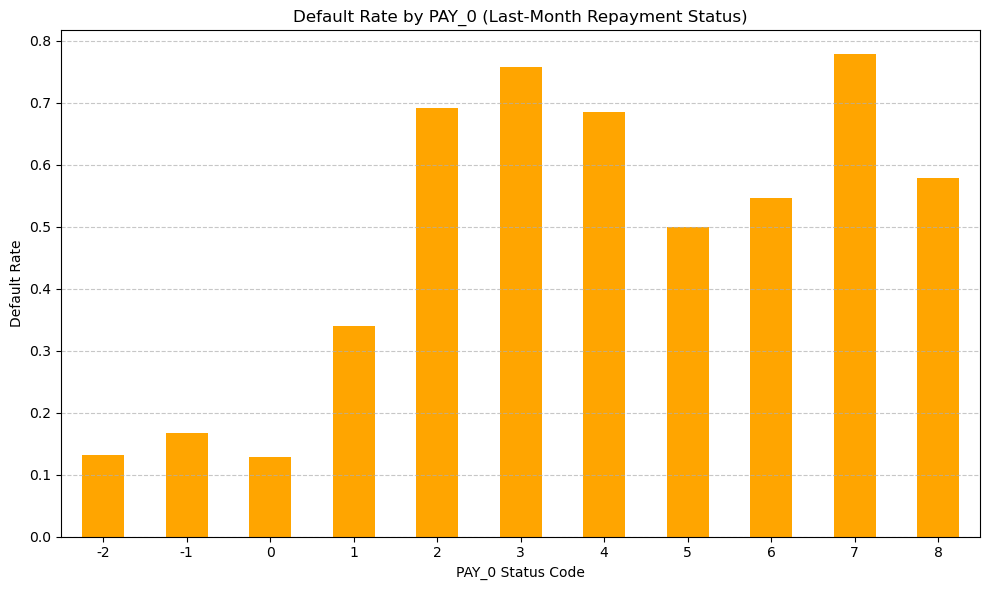

In [34]:
# Group by PAY_0 and calculate default rate
pay0_default_rate = df.groupby("PAY_0")["default payment next month"].mean()

# Plot
plt.figure(figsize=(10, 6))
pay0_default_rate.plot(kind="bar", color="orange")
plt.title("Default Rate by PAY_0 (Last-Month Repayment Status)")
plt.xlabel("PAY_0 Status Code")
plt.ylabel("Default Rate")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

around 69% of customers with a repayment status of 2 (i.e., 2-month delay) defaulted next month. This strong upward trend from PAY_0 = 0 to 3 indicates that the longer the repayment delay, the higher the risk of default.

Average Default Rate by PAY features

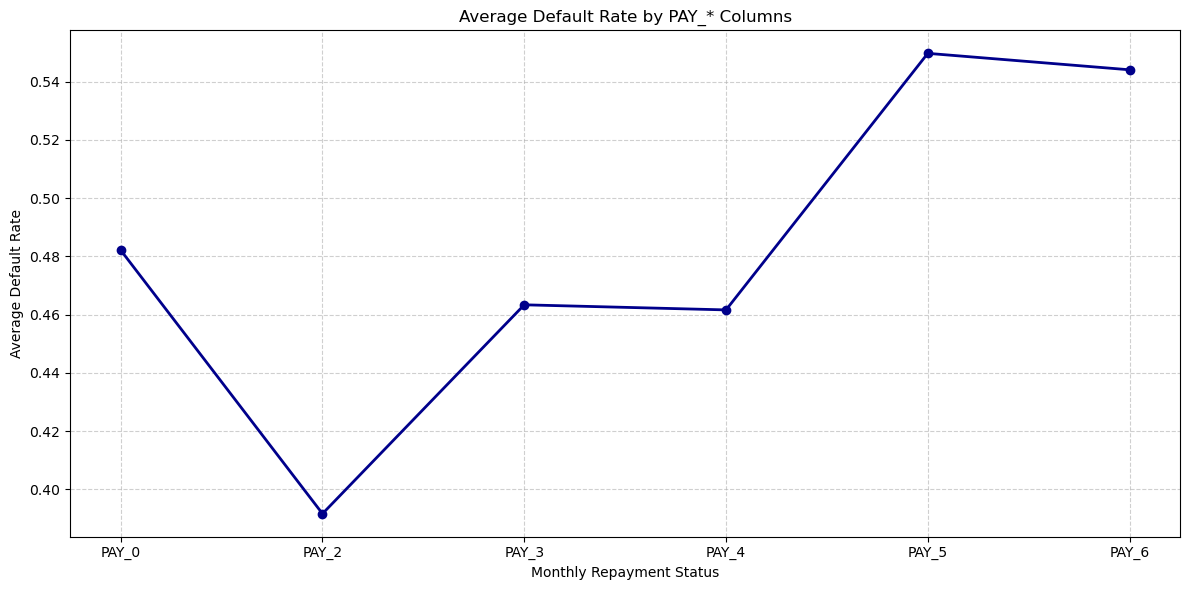

In [35]:
# Select PAY_* columns
pay_cols = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

# Calculate average default rate by each PAY_* column
default_means = []
for col in pay_cols:
    default_means.append(df.groupby(col)["default payment next month"].mean().mean())  # overall mean per column

# Plot
plt.figure(figsize=(12, 6))
plt.plot(pay_cols, default_means, marker='o', color='darkblue', linewidth=2)
plt.title("Average Default Rate by PAY_* Columns")
plt.xlabel("Monthly Repayment Status")
plt.ylabel("Average Default Rate")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This trend confirms the predictive power of repayment history. Clients with a consistent pattern of delays are much more likely to default, emphasizing the importance of these temporal credit behavior variables when building predictive models.

Default Rate by credit limit balance

C:\Users\Mamdouh\AppData\Local\Temp\ipykernel_35680\692264326.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  limit_default_rate = df_copy.groupby('limit_bin')['default payment next month'].mean()


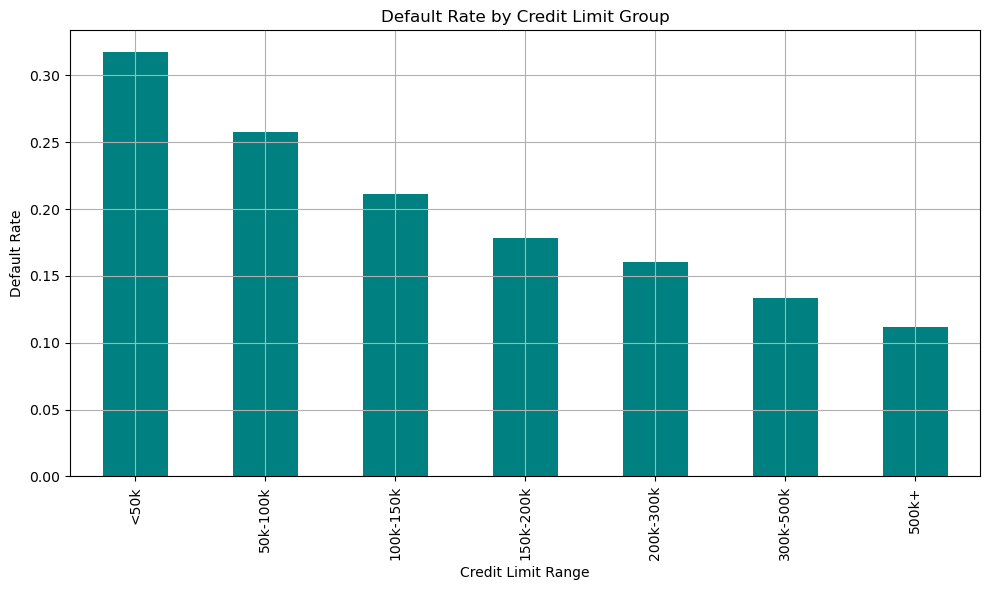

In [36]:
# Bin credit limits into ranges
df_copy = df.copy()
df_copy['limit_bin'] = pd.cut(df['LIMIT_BAL'], bins=[0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000], 
                         labels=['<50k', '50k-100k', '100k-150k', '150k-200k', '200k-300k', '300k-500k', '500k+'])

# Calculate default rate per limit group
limit_default_rate = df_copy.groupby('limit_bin')['default payment next month'].mean()

# Plot
limit_default_rate.plot(kind='bar', color='teal', figsize=(10,6))
plt.title("Default Rate by Credit Limit Group")
plt.xlabel("Credit Limit Range")
plt.ylabel("Default Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

 Clients with lower credit limits (under 50k or 100k) show a much higher default rate, while wealthier customers with higher limits are significantly more creditworthy.

This suggests that income level or spending capacity (proxied by credit limit) plays a key role in predicting default, making it a vital feature for credit risk models.

Number of delayed months by default status

C:\Users\Mamdouh\AppData\Local\Temp\ipykernel_35680\3430938004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='default payment next month', y='num_delays', palette='coolwarm')


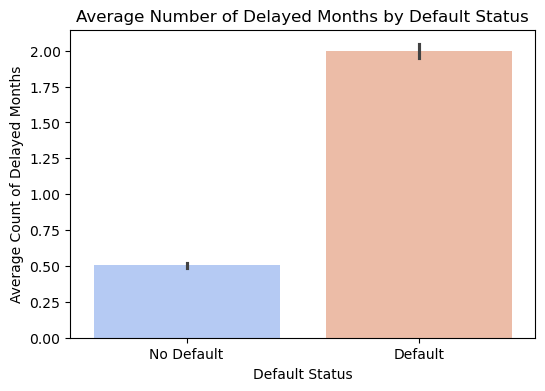

In [37]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='default payment next month', y='num_delays', palette='coolwarm')
plt.title('Average Number of Delayed Months by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Average Count of Delayed Months')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

Customers who did not default had on average ~0.5 delayed months over the past 6 months.

In contrast, customers who defaulted had close to 2 delayed months on average.

### Check class balance

understanding the target variable balance (number of customers defauled and didn't default)

In [38]:
# Get number fraud transactions
df['default payment next month'].value_counts()
# Get percentages of fraud transactions
df['default payment next month'].value_counts(normalize = True) *100

default payment next month
0    77.88
1    22.12
Name: proportion, dtype: float64

<Axes: xlabel='default payment next month'>

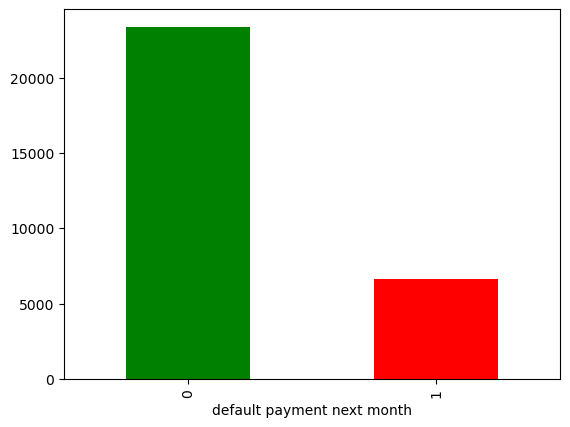

In [39]:
#visualizing class balance
df['default payment next month'].value_counts().plot.bar(color=['green', 'red'])

there seems to be a class imbalance , however , it's not severe , so we will keep it as it is

# paCe: Construct Stage

## Step 3. Model Building

This is a classification task , since our target variable is categorical consisting of 0 and 1. 

we will proceed with three classifiers:
 - Random Forest
 - XGBOOST

### Modeling

In [36]:
# Identifying features and target variable
X = df[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4']]
y = df['default payment next month']

In [3]:
df[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4']]

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,BILL_AMT2,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4
0,20000,2,2,-1,-1,-2,3913,3102,0,689,0,0
1,120000,-1,2,0,0,0,2682,1725,0,1000,1000,1000
2,90000,0,0,0,0,0,29239,14027,1518,1500,1000,1000
3,50000,0,0,0,0,0,46990,48233,2000,2019,1200,1100
4,50000,-1,0,-1,0,0,8617,5670,2000,36681,10000,9000
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,0,0,0,0,0,188948,192815,8500,20000,5003,3047
29996,150000,-1,-1,-1,-1,0,1683,1828,1837,3526,8998,129
29997,30000,4,3,2,-1,0,3565,3356,0,0,22000,4200
29998,80000,1,-1,0,0,0,-1645,78379,85900,3409,1178,1926


In [37]:
# Split dataset into training , validating holdout(test) datasets

#creating Training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.3 , stratify=y , random_state = 42)

#creating a validation set
X_tr , X_val , y_tr , y_val = train_test_split(X_train, y_train , test_size = 0.5,  stratify=y_train , random_state = 10)

Let's illustrate what we are doing here , simply we are splitting our dataset to training and testing set as normal , but we want to apply the **cross validation** technique , which means that we will train our model using the training data as normal , but we won't check the model accuracy on the test data , instead we will use our validation set to train all the models we are going to experiment.
now the question is what should be done with the test data 🤔 ????!
the test data will remain unseen until we finish building all the models , finally the champion model (the model with higher accuracy scores) will only be used to predict on the testing data 😎.
the following diagram illustrates the idea. 

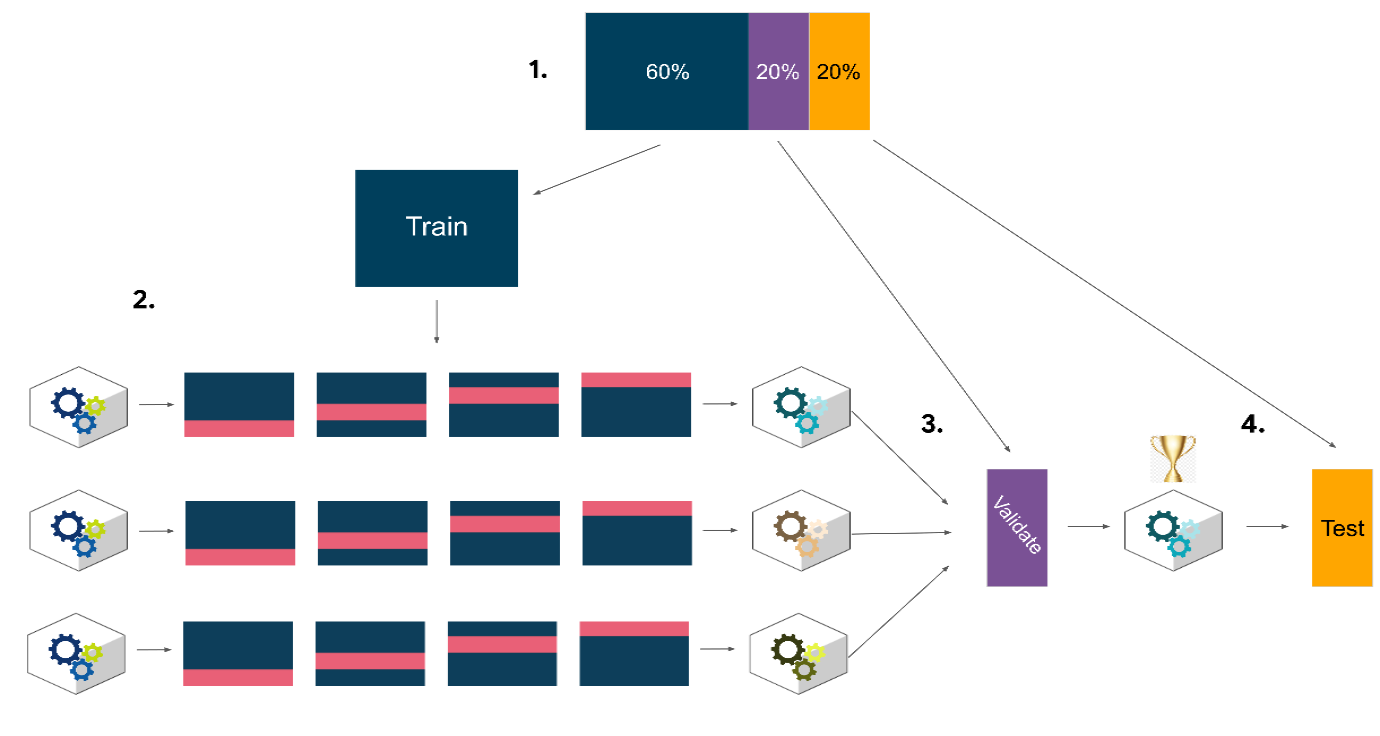

Note: it's not a must to split the data 60 20 20 , in our case here , we are splitting it to 70 15 15

## Experiment 1: Random Forest

In [38]:
# Instantiate random forest model.
rf = RandomForestClassifier(class_weight='balanced')

In [39]:
# Determine set of hyperparameters for random forest
rf_cv_params = {'n_estimators' : [50,100 , 150 , 200], 
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50],
             'min_samples_split': [2, 4, 6],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

scores = {'accuracy': 'accuracy' , 'precision':'precision', 'recall' : 'recall', 'f1':'f1'}

GridSearchCV wants to cross validate the data. In fact, if the CV parameter was left blank, it would split the data into five folds for cross-validation by default. Because we are using a separate validation set, it's important to explicitly tell the function how to perform the validation. This includes telling it every row in the training and testing sets. we will use a **list comprehension** to generate a list of the same length as our X_tr data, where each value is either a negative one or a zero. we used the list stored in the **split_index** variable to indicate to GridSearchCV that each row labeled negative 1 is in the training set and each row labeled as zero is in the validation set.

In [40]:
# Create list of split indices.
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [41]:
%%time 
rf_val = GridSearchCV(rf, rf_cv_params, cv= custom_split, scoring = scores ,  refit='f1', n_jobs = -1, verbose = 1)

# Fit the model
rf_val.fit(X_train , y_train)

Fitting 1 folds for each of 1680 candidates, totalling 1680 fits
CPU times: total: 11.6 s
Wall time: 3min 59s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ...,  0, -1])),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'max_features': ['sqrt'], 'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [2, 5, 10, 20, 50],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150, 200]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'},
             verbose=1)

In [42]:
#getting the best paramaters to be used with Random forest
rf_val.best_params_

{'max_depth': 40,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 10,
 'min_samples_split': 4,
 'n_estimators': 150}

In [34]:
# Use SelectFromModel to select features above median importance
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rf_val.best_estimator_, threshold="median", prefit=True)
X_selected = selector.transform(X)

# Get names of selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

Selected Features: ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4']


C:\Users\Mamdouh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


#### We are going to use the confusion matrix & accuracy measures to test the accuracy of each model we will create , so let's create a function that takes three arguments , model , x_data and y_data , to prevent code duplication

In [43]:
#creating a confusion matrix to identify how accurate our classifier is
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data) # Save predictions
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_) # Calculate the values for each quadrant in the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(values_format='')  # `values_format=''` this is written to prevent the numbers in the confusion matrix to appear in that form (1.5e+03) 
    plt.show()    
    
    #Accuracy reports
    report =    {"Accuracy" :accuracy_score(y_data, model_pred) , 
                "Precision": precision_score(y_data, model_pred),
                "Recall" : recall_score(y_data, model_pred) , 
                "F1 Score" : f1_score(y_data, model_pred)}
    for key , value  in report.items():
        print(f"{key}:{round(value , 3)}")

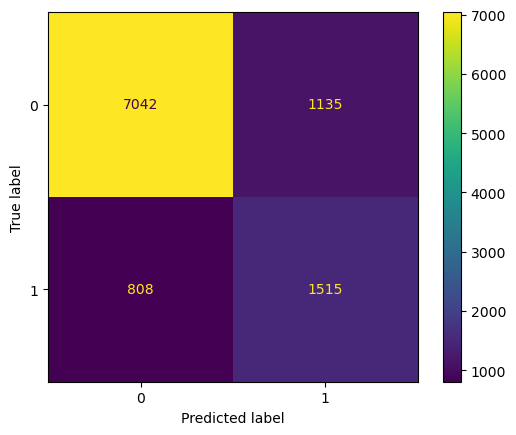

Accuracy:0.815
Precision:0.572
Recall:0.652
F1 Score:0.609


In [44]:
conf_matrix_plot(rf_val.best_estimator_, X_val, y_val)

## Experiment 2: Gradient boosting (XGBOOST)

#### In this experiment , let's use another tree-based ensemble model  ,  XGBOOST  

In [44]:
#Instantiate XGBOOST classifier
xgb = XGBClassifier(objective='binary:logistic')

In [45]:
# Determine set of hyperparameters for XGBOOST
xgb_cv_params = {'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50],
              'min_child_weight': [3, 5 , 10 , 15 , 20 , 30 , 50 , 70 , 100],
              'learning_rate': [0.1, 0.2, 0.3 , 0.5 ,0.7 ,0.9],
              'n_estimators': [50,100 , 150 , 200],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

scores = ['accuracy','recall', 'f1' , 'precision']

In [46]:
%%time
xgb_cv = GridSearchCV(xgb,xgb_cv_params,scoring = scores,cv = custom_split ,refit = 'f1',n_jobs = -1, verbose = 1)

# Fit the model
xgb_cv.fit(X_train, y_train)

Fitting 1 folds for each of 3024 candidates, totalling 3024 fits
CPU times: total: 25.7 s
Wall time: 4min 27s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ...,  0, -1])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_child_weight': [3, 5, 10, 15, 20, 30, 50, 70,
                                              100],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'recall', 'f1', 'precision'],
             verbose=1)

In [47]:
#getting the best paramaters to be used with XGBOOST
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 100,
 'n_estimators': 50,
 'subsample': 0.7}

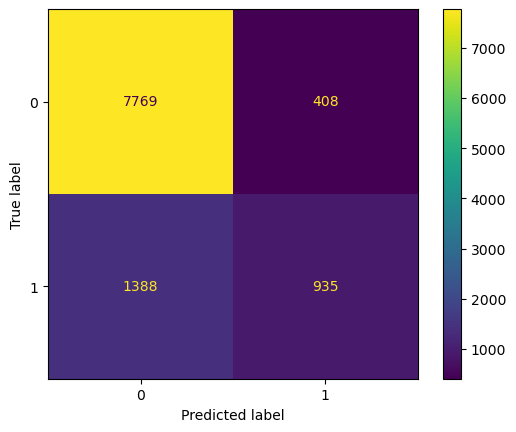

Accuracy:0.829
Precision:0.696
Recall:0.402
F1 Score:0.51


In [48]:
conf_matrix_plot(xgb_cv.best_estimator_, X_val, y_val)

## Step 4. Results and Evaluation

### Summary of model results

#### let's Compare all the alogtithms used together to identify the Champion model

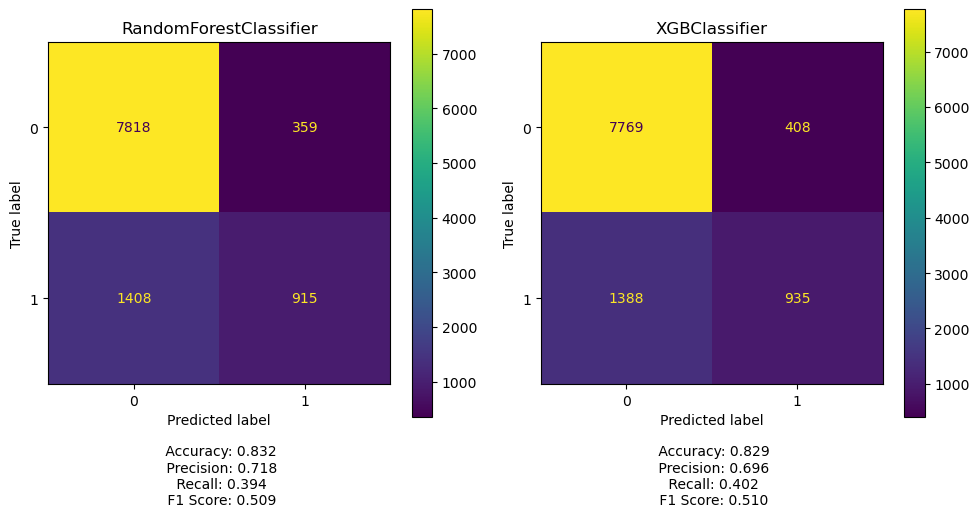

In [49]:
# Collecting our classifiers in a list
classifiers = [rf_val.best_estimator_, xgb_cv.best_estimator_]

# Create a grid of subplots to compare the confusion matrices and accuracy measures
num_classifiers = len(classifiers)

fig, axes = plt.subplots(1, num_classifiers, figsize=(5 * num_classifiers, 5))

# Iterate over each classifier and display its confusion matrix along with its accuracy measures
for i, model in enumerate(classifiers):
    # Compute the confusion matrix
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred, labels=model.classes_)
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], values_format='')
    axes[i].set_title(model.__class__.__name__)  # Set the title to the classifier name
    
    # Compute accuracy measures
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Add text annotations for accuracy measures
    textstr = f' \n \n \n \n \n Accuracy: {acc:.3f}\n Precision: {prec:.3f}\n Recall: {rec:.3f}\n F1 Score: {f1:.3f}'
    axes[i].text(0.5, -0.15, textstr, horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()


# By comparing the results of the two classifiers used , the champion model with f1-score 0.510 ,  is **XGBOOST** 🏆🥇

Now let's evaluate the champion model on the unseen test set

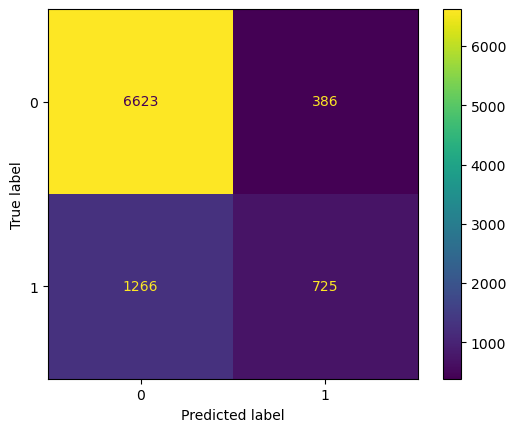

Accuracy:0.816
Precision:0.653
Recall:0.364
F1 Score:0.467


In [50]:
conf_matrix_plot(xgb_cv.best_estimator_, X_test, y_test)